In [1]:
import sys
sys.path.insert(0, "../../python")

import os
from ionization import ionization
from ionization import adk
from propagation import propagation
from propagation import laser
from lens import profile
from lens import bessel
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq, fftshift
from scipy.special import jn
from ht import intht

[ 0.0907669   0.06505236  0.05630144  0.04188994]


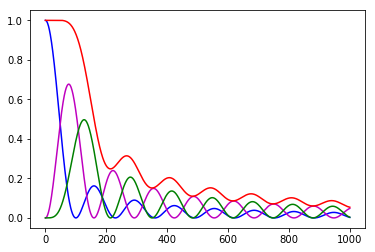

In [42]:
# First we need to expand the cross section in Bessel functions
# Time delay means we effectively add intensity so Absolute value of Bessel functions
# (Technically we multiply ionization fractions but this should give us a good first pass)
# Start by assuming all of the Bessel functions have the same center frequency

R = 0.1e3 # Radius to the first zero of the Bessel
r = np.linspace(0, 1e3, 1000, False)
kr0 = 2.4048 / R
I = np.zeros(1000)
I[r < 0.2e3] = 1.0
# Coefficents on the different Bessel functions
cn = np.zeros(4)
for i in range(0, 4):
    cn[i] = integrate.simps(I * abs(jn(i, kr0*r)), r)/1000
print(cn)
cn = [1., 2.0, 2.1, 0]
Itest = cn[0]*jn(0, kr0*r)**2 + cn[1]*jn(1, kr0*r)**2 + cn[2]*jn(2, kr0*r)**2 + cn[3]*jn(3, kr0*r)**2
plt.plot(r, jn(0, kr0*r)**2, 'b-', r, cn[1]*jn(1, kr0*r)**2, 'm-', r, cn[2]*jn(2, kr0*r)**2, 'g-',r, Itest, 'r')
plt.show()
# Maybe the first 3 could give us about 400um diameter pulse

In [ ]:
# To test lets try simulating with these parameters
